Processando base de dados

Variáveis: file, alg, min_support, separar_paragrafos

In [46]:
import importlib
import utils.pre_processing_news as ppn

importlib.reload(ppn)

file = "manifestacao_bolsonaro"
#file = "resgate_juliana_marins"
#file = "morte_juliana_marins"
#file = "manifestacao_resgate"
separar_paragrafos = True
isTitulo = False

input_file = "datasets/" + file + ".csv"
column = "Título" if isTitulo else "Texto"

# 1. Pré processando base de dados
print("Pré-processando textos...")
pre_processing_result, noticias = ppn.pre_processing_database(
    file_path = input_file,
    separar_paragrafos = separar_paragrafos,
    column=column
)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luiza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Pré-processando textos...


Gerando Trie of Rules

Gerando árvore de regras (TOR)...


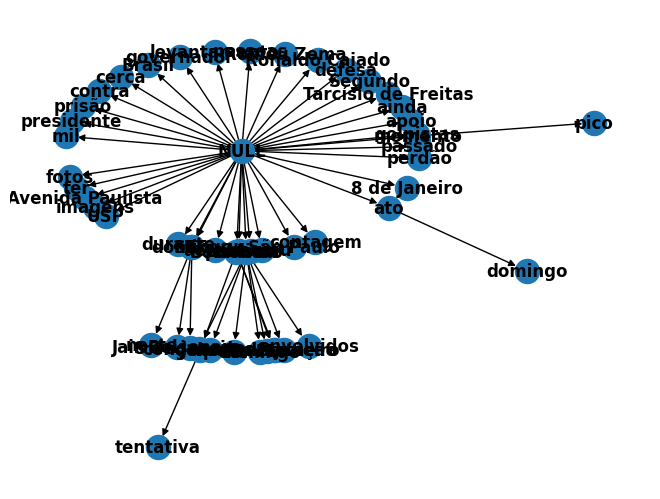

In [3]:
from trieofrules import trieofrules

#supported algorithms: FP-max, FP-growth, Apriori
#alg = 'Apriori'
alg = 'FP-max'
min_support = 0.05

obs = "p" if separar_paragrafos else "n"
obs = "titulos" if isTitulo else obs
file_name = f"{file}_{obs}_{alg}_{min_support}"
output_file = f"outputs/{file_name}.graphml"

# 2. Gera o TOR (Trie of Rules) a partir dos dados
print("Gerando árvore de regras (TOR)...")
TOR = trieofrules(data=pre_processing_result, alg=alg, min_support=min_support)
TOR.draw()

In [76]:
# 3. Salva a visualização e estrutura como .graphml
print("Salvando .graphml...")
TOR.save_graph(filename=output_file)

Salvando .graphml...


Analisando contexto das ocorrências

In [ ]:
import utils.analize_tor as ator

importlib.reload(ator)

palavra_mais_usada = next(iter(TOR.frequent_items)).lower() 
ator.concordance(noticias, palavra_mais_usada)

Recomendar notícia mais compacta e relevante

In [ ]:
import utils.analize_tor as ator

importlib.reload(ator)

proporcoes, resumo = ator.recomendar_texto(noticias, output_file)
print("Texto recomendado:", resumo)

In [ ]:
import utils.analize_tor as ator

importlib.reload(ator)

ator.recomendar_texto_centralidade_semantica(input_file)

Outras visualizações

In [ ]:
#Nuvem de palavras

import csv
import os
import importlib
import utils.other_visualizations as ovi

importlib.reload(ovi)

pasta_raking = "ranking_palavras"
os.makedirs(pasta_raking, exist_ok=True)

ranking = ovi.ranking_words(pre_processing_result)
file_ranking = os.path.join(pasta_raking, f"{file_name}_ranking_palavras.csv")
with open(file_ranking, mode="w", newline="", encoding="utf-8") as arquivo_csv:
    writer = csv.writer(arquivo_csv)
    writer.writerows(ranking)

In [ ]:
#TextArc, Word Tree - Todos os textos como uma string 

print(" ".join(noticias))

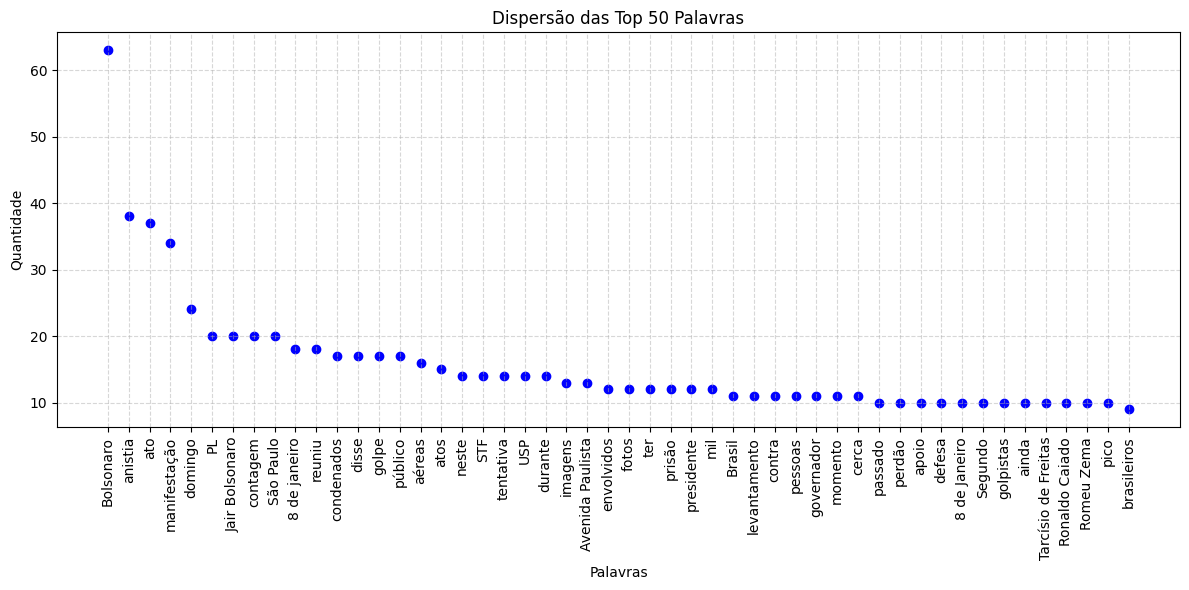

In [59]:
# Gráfico de frequência

import pandas as pd
import utils.other_visualizations as ovi

importlib.reload(ovi)

df = pd.read_csv(file_ranking, names=['palavra', 'quantidade'])
ovi.scartter_plot_from_ranking(df)


In [67]:

import utils.other_visualizations as ovi

importlib.reload(ppn)
importlib.reload(ovi)

pre_processing_result_simples, noticias = ppn.pre_processing_database(
    file_path = input_file,
    separar_paragrafos = separar_paragrafos,
    column=column,
    simples=True
)

importlib.reload(ovi)
ovi.generate_graph_file(pre_processing_result_simples, "output.gdf")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luiza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
